# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import timeit
import zipfile
from numpy import genfromtxt
import pandas as pd
import seaborn as sns

In [2]:
from lolopy.learners import RandomForestClassifier as loloClassifier # lolopy Random forest
from sklearn.ensemble import RandomForestClassifier # scikit learn Random Forest
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# DATA Loading

In [3]:
cdir = os.getcwd()
print(cdir)
zip_dir = '/home/vazumah/AIML24787-Project/'
os.chdir(zip_dir)

/home/vazumah


In [4]:
with zipfile.ZipFile('ML_Final_Project_Data.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [5]:
# Starting with MXene data
A_x = genfromtxt('./ML Final Project Data/a_mxene.csv',delimiter=',')
print(A_x.shape)
A_x_clean = A_x[1:, 1:]
print(A_x_clean.shape)
A_y = np.zeros([A_x_clean.shape[0],1])
# A_x_p = np.chararray([A_x_clean.shape[0],1])
A_x_p= np.zeros([A_x_clean.shape[0],1]) # 'Purine'
# A_x_p = A_x_p.reshape(-1,1)

(98, 3)
(97, 2)


In [6]:
C_x = genfromtxt('./ML Final Project Data/c_mxene.csv',delimiter=',')
print(C_x.shape)
C_x_clean = C_x[1:, 1:]
print(C_x_clean.shape)
C_y = np.ones([C_x_clean.shape[0],1])
# C_x_p = np.chararray([C_x_clean.shape[0],1])
C_x_p= np.ones([C_x_clean.shape[0],1]) #'Pyrimidine'
# C_x_p = C_x_p.reshape(-1,1)

(94, 3)
(93, 2)


In [7]:
G_x = genfromtxt('./ML Final Project Data/g_mxene.csv',delimiter=',')
print(G_x.shape)
G_x_clean = G_x[1:, 1:]
print(G_x_clean.shape)
G_y = np.zeros([G_x_clean.shape[0],1])
G_y[:]= 2
# G_x_p = np.chararray([G_x_clean.shape[0],1])
G_x_p= np.zeros([G_x_clean.shape[0],1]) #'Purine'
# G_x_p = G_x_p.reshape(-1,1)

(53, 3)
(52, 2)


In [8]:
T_x = genfromtxt('./ML Final Project Data/t_mxene.csv',delimiter=',')
print(T_x.shape)
T_x_clean = T_x[1:, 1:]
print(T_x_clean.shape)
T_y = np.zeros([T_x_clean.shape[0],1])
T_y[:] = 3
# T_x_p = np.chararray([T_x_clean.shape[0],1])
T_x_p= np.ones([T_x_clean.shape[0],1]) #'Pyrimidine'
# T_x_p = T_x_p.reshape(-1,1)

(90, 3)
(89, 2)


In [46]:
X = np.concatenate((A_x_clean, C_x_clean,G_x_clean,T_x_clean), axis=0)
y = np.concatenate((A_y, C_y,G_y,T_y), axis=0)

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size =  0.3, random_state=300)

# Classification

### Decision Tree Classification

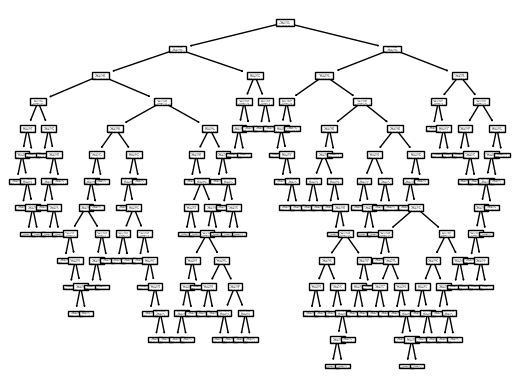

In [11]:
decTree = tree.DecisionTreeClassifier()
decTree = decTree.fit(X_train, y_train)
tree.plot_tree(decTree)
decTree_res_pred = decTree.predict(X_test)
decTree_score = accuracy_score(y_test, decTree_res_pred)

### Random Forest Classification

In [66]:
# with Scikit learn
sRanFor = RandomForestClassifier()
sRanFor = sRanFor.fit(X_train, y_train.flatten())
sRanFor_res_pred = sRanFor.predict(X_test)
sRanFor_score = accuracy_score(y_test, sRanFor_res_pred)

In [13]:
sRanFor_ent = RandomForestClassifier(criterion='entropy')
sRanFor_ent = sRanFor_ent.fit(X_train, y_train.flatten())
sRanFor_ent_res_pred = sRanFor_ent.predict(X_test)
sRanFor_ent_score = accuracy_score(y_test, sRanFor_ent_res_pred)

In [14]:
sRanFor_log = RandomForestClassifier(criterion='log_loss')
sRanFor_log = sRanFor_log.fit(X_train, y_train.flatten())
sRanFor_log_res_pred = sRanFor_log.predict(X_test)
sRanFor_log_score = accuracy_score(y_test, sRanFor_log_res_pred)

In [15]:
# with lolopy
lRanFor = loloClassifier()
lRanFor = lRanFor.fit(X_train, y_train.flatten())
lRanFor_res_pred = lRanFor.predict(X_test)
lRanFor_score = accuracy_score(y_test, lRanFor_res_pred)

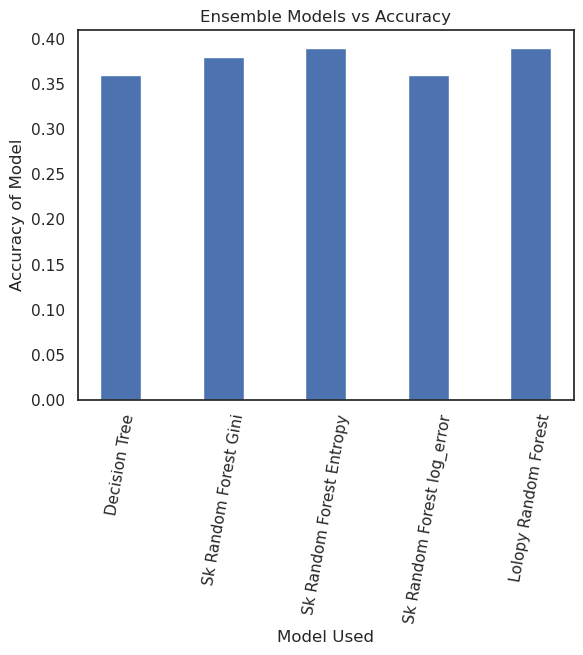

In [71]:
# Accuracy plots
labels = ['Decision Tree', 'Sk Random Forest Gini', 'Sk Random Forest Entropy',\
    'Sk Random Forest log_error', 'Lolopy Random Forest']
values = [decTree_score, sRanFor_score, sRanFor_ent_score, sRanFor_log_score, lRanFor_score]

# creating the bar plot
plt.bar(labels, values, width = 0.4)
 
plt.xlabel("Model Used")
plt.ylabel("Accuracy of Model")
plt.title("Ensemble Models vs Accuracy")
plt.xticks(rotation=80)
plt.show()

In [17]:
# Dec tree score per base
A_score_dec = accuracy_score(y_test[y_test==0], decTree_res_pred.reshape(-1,1)[y_test==0])
C_score_dec = accuracy_score(y_test[y_test==1], decTree_res_pred.reshape(-1,1)[y_test==1])
G_score_dec = accuracy_score(y_test[y_test==2], decTree_res_pred.reshape(-1,1)[y_test==2])
T_score_dec = accuracy_score(y_test[y_test==3], decTree_res_pred.reshape(-1,1)[y_test==3])


In [18]:
A_score_sF = accuracy_score(y_test[y_test==0], sRanFor_res_pred.reshape(-1,1)[y_test==0])
C_score_sF = accuracy_score(y_test[y_test==1], sRanFor_res_pred.reshape(-1,1)[y_test==1])
G_score_sF = accuracy_score(y_test[y_test==2], sRanFor_res_pred.reshape(-1,1)[y_test==2])
T_score_sF = accuracy_score(y_test[y_test==3], sRanFor_res_pred.reshape(-1,1)[y_test==3])

In [19]:
A_score_lF = accuracy_score(y_test[y_test==0], lRanFor_res_pred.reshape(-1,1)[y_test==0])
C_score_lF = accuracy_score(y_test[y_test==1], lRanFor_res_pred.reshape(-1,1)[y_test==1])
G_score_lF = accuracy_score(y_test[y_test==2], lRanFor_res_pred.reshape(-1,1)[y_test==2])
T_score_lF = accuracy_score(y_test[y_test==3], lRanFor_res_pred.reshape(-1,1)[y_test==3])

In [20]:
groups = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
totals = [decTree_score, sRanFor_score,lRanFor_score]
A_scores = [A_score_dec,A_score_sF,A_score_lF]
C_scores = [C_score_dec,C_score_sF,C_score_lF]
G_scores = [G_score_dec,G_score_sF,G_score_lF]
T_scores = [T_score_dec,T_score_sF,T_score_lF]

group_dic = {'Models':[*groups[:], *groups[:], *groups[:], *groups[:], *groups[:]],
             'Scores':[*totals[:], *A_scores[:], *C_scores[:], *G_scores[:], *T_scores[:]],
             'Classes': ['Totals','Totals','Totals',
                        'A','A','A','C','C','C',
                        'G','G','G','T','T', 'T']}

group_list = [dict(zip(group_dic,t)) for t in zip(*group_dic.values())]


[Text(0.5, 1.0, 'Model Accuracy per Nucleotide')]

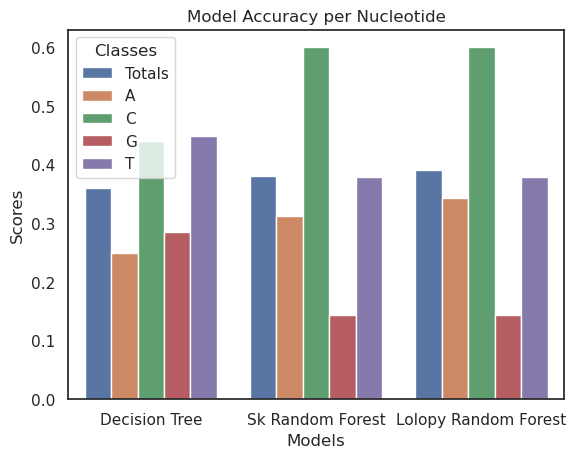

In [63]:
group_df = pd.DataFrame(group_list)
# group_df = pd.DataFrame.from_dict(group_dic)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=group_df).set(title='Model Accuracy per Nucleotide')  

In [22]:
# With Feature Engineering
X_eng = X # to be feature engineered
X1 = X_eng[:,0]/X_eng[:,1]
X2 = X_eng[:,0]*X_eng[:,1]
X_eng_1 = np.concatenate((X,X1.reshape(-1,1),X2.reshape(-1,1)), axis=1)

In [23]:
(Xe_train, Xe_test, ye_train, ye_test) = train_test_split(X_eng_1, y, test_size =  0.3, random_state=300)

In [24]:
decTree1 = tree.DecisionTreeClassifier()
decTree1 = decTree1.fit(Xe_train, ye_train)
# tree.plot_tree(decTree1)
decTree_res_pred1 = decTree1.predict(Xe_test)
decTree_score1 = accuracy_score(ye_test, decTree_res_pred1)

In [25]:
sRanFor1 = RandomForestClassifier()
sRanFor1 = sRanFor1.fit(Xe_train, ye_train.flatten())
sRanFor1_res_pred = sRanFor1.predict(Xe_test)
sRanFor1_score = accuracy_score(ye_test, sRanFor1_res_pred)

In [26]:
lRanFor1 = loloClassifier()
lRanFor1 = lRanFor1.fit(Xe_train, ye_train.flatten())
lRanFor_res_pred1 = lRanFor1.predict(Xe_test)
lRanFor_score1 = accuracy_score(ye_test, lRanFor_res_pred1)

#### Feature Engineering with Purines/Pyrimidines

In [47]:
dna_class = np.concatenate((A_x_p, C_x_p,G_x_p,T_x_p), axis=0) # a column of DNA classes
Xeng2 = np.concatenate((X,dna_class), axis=1)
# X_eng_1 = np.concatenate((X,X1.reshape(-1,1),X2.reshape(-1,1)), axis=1)

In [48]:
(Xe2_train, Xe2_test, ye2_train, ye2_test) = train_test_split(Xeng2, y, test_size =  0.3, random_state=300)

In [49]:
decTree2 = tree.DecisionTreeClassifier()
decTree2 = decTree2.fit(Xe2_train, ye2_train)
# tree.plot_tree(decTree1)
decTree2_res_pred = decTree2.predict(Xe2_test)
decTree2_score = accuracy_score(ye2_test, decTree2_res_pred)

In [50]:
lRanFor2 = loloClassifier()
lRanFor2 = lRanFor2.fit(Xe2_train, ye2_train.flatten())
lRanFor2_res_pred = lRanFor2.predict(Xe2_test)
lRanFor2_score = accuracy_score(ye2_test, lRanFor2_res_pred)

In [51]:
sRanFor2 = RandomForestClassifier()
sRanFor2 = sRanFor2.fit(Xe2_train, ye2_train.flatten())
sRanFor2_res_pred = sRanFor2.predict(Xe2_test)
sRanFor2_score = accuracy_score(ye2_test, sRanFor2_res_pred)

In [52]:
# Dec tree score per base
A_score_dec2 = accuracy_score(ye2_test[ye2_test==0], decTree2_res_pred.reshape(-1,1)[ye2_test==0])
C_score_dec2 = accuracy_score(ye2_test[ye2_test==1], decTree2_res_pred.reshape(-1,1)[ye2_test==1])
G_score_dec2 = accuracy_score(ye2_test[ye2_test==2], decTree2_res_pred.reshape(-1,1)[ye2_test==2])
T_score_dec2 = accuracy_score(ye2_test[ye2_test==3], decTree2_res_pred.reshape(-1,1)[ye2_test==3])

A_score_sF2 = accuracy_score(ye2_test[ye2_test==0], sRanFor2_res_pred.reshape(-1,1)[ye2_test==0])
C_score_sF2 = accuracy_score(ye2_test[ye2_test==1], sRanFor2_res_pred.reshape(-1,1)[ye2_test==1])
G_score_sF2 = accuracy_score(ye2_test[ye2_test==2], sRanFor2_res_pred.reshape(-1,1)[ye2_test==2])
T_score_sF2 = accuracy_score(ye2_test[ye2_test==3], sRanFor2_res_pred.reshape(-1,1)[ye2_test==3])

A_score_lF2 = accuracy_score(ye2_test[ye2_test==0], lRanFor2_res_pred.reshape(-1,1)[ye2_test==0])
C_score_lF2 = accuracy_score(ye2_test[ye2_test==1], lRanFor2_res_pred.reshape(-1,1)[ye2_test==1])
G_score_lF2 = accuracy_score(ye2_test[ye2_test==2], lRanFor2_res_pred.reshape(-1,1)[ye2_test==2])
T_score_lF2 = accuracy_score(ye2_test[ye2_test==3], lRanFor2_res_pred.reshape(-1,1)[ye2_test==3])

[Text(0.5, 1.0, 'Model Accuracy with Purine/Pyrimidine Type')]

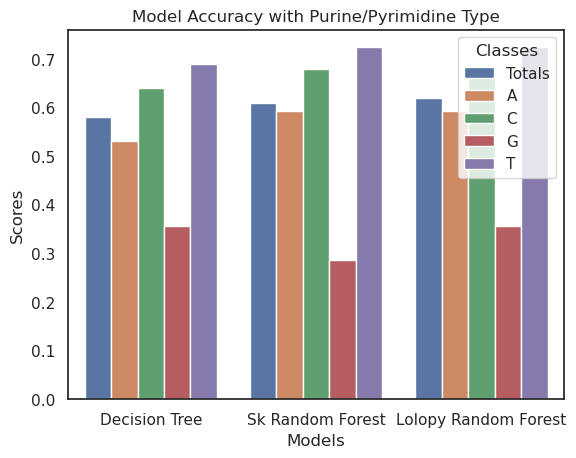

In [61]:
groups_2 = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
totals_2 = [decTree2_score, sRanFor2_score,lRanFor2_score]
A_scores_2 = [A_score_dec2,A_score_sF2,A_score_lF2]
C_scores_2 = [C_score_dec2,C_score_sF2,C_score_lF2]
G_scores_2 = [G_score_dec2,G_score_sF2,G_score_lF2]
T_scores_2 = [T_score_dec2,T_score_sF2,T_score_lF2]

group_dic_2 = {'Models':[*groups_2[:], *groups_2[:], *groups_2[:], *groups_2[:], *groups_2[:]],
             'Scores':[*totals_2[:], *A_scores_2[:], *C_scores_2[:], *G_scores_2[:], *T_scores_2[:]],
             'Classes': ['Totals','Totals','Totals',
                        'A','A','A','C','C','C',
                        'G','G','G','T','T', 'T']}

group_list_2 = [dict(zip(group_dic_2,t)) for t in zip(*group_dic_2.values())]

group_df_2 = pd.DataFrame(group_list_2)
# group_df = pd.DataFrame.from_dict(group_dic)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=group_df_2).set(title='Model Accuracy with Purine/Pyrimidine Type') 

#### Classifying only Purines and Pyrimidines

In [54]:
#Purine Pyrimidines only
(Xep_train, Xep_test, yep_train, yep_test) = train_test_split(X, dna_class, test_size =  0.3, random_state=300)

In [55]:
decTree_p = tree.DecisionTreeClassifier()
decTree_p = decTree_p.fit(Xep_train, yep_train)
decTree_p_res_pred = decTree_p.predict(Xep_test)
decTree_p_score = accuracy_score(yep_test, decTree_p_res_pred)

lRanFor_p = loloClassifier()
lRanFor2 = lRanFor_p.fit(Xep_train, yep_train.flatten())
lRanFor_p_res_pred = lRanFor_p.predict(Xep_test)
lRanFor_p_score = accuracy_score(yep_test, lRanFor_p_res_pred)

sRanFor_p = RandomForestClassifier()
sRanFor_p = sRanFor_p.fit(Xep_train, yep_train.flatten())
sRanFor_p_res_pred = sRanFor_p.predict(Xep_test)
sRanFor_p_score = accuracy_score(yep_test, sRanFor_p_res_pred)

In [57]:
# Dec tree score per base
Purine_score_dec = accuracy_score(yep_test[yep_test==0], decTree_p_res_pred.reshape(-1,1)[yep_test==0])
Pyrimidine_score_dec = accuracy_score(yep_test[yep_test==1], decTree_p_res_pred.reshape(-1,1)[yep_test==1])

Purine_score_sF = accuracy_score(yep_test[yep_test==0], sRanFor_p_res_pred.reshape(-1,1)[yep_test==0])
Pyrimidine_score_sF = accuracy_score(yep_test[yep_test==1], sRanFor_p_res_pred.reshape(-1,1)[yep_test==1])

Purine_score_lF = accuracy_score(yep_test[yep_test==0], lRanFor_p_res_pred.reshape(-1,1)[yep_test==0])
Pyrimidine_score_lF = accuracy_score(yep_test[yep_test==1], lRanFor_p_res_pred.reshape(-1,1)[yep_test==1])


In [58]:
totals_p = [decTree_p_score, sRanFor_p_score,lRanFor_p_score]
Purine_scores = [Purine_score_dec,Purine_score_sF,Purine_score_lF]
Pyrimidine_scores = [Pyrimidine_score_dec,Pyrimidine_score_sF,Pyrimidine_score_lF]


group_dic_p = {'Models':[*groups[:], *groups[:], *groups[:]],
             'Scores':[*totals_p[:], *Purine_scores[:], *Pyrimidine_scores[:]],
             'Classes': ['Totals','Totals','Totals',
                        'Purine','Purine','Purine','Pyrimidine','Pyrimidine','Pyrimidine']}

group_list_p = [dict(zip(group_dic_p,t)) for t in zip(*group_dic_p.values())]


[Text(0.5, 1.0, 'Binary Classification into Purine/Pyrimidine Type')]

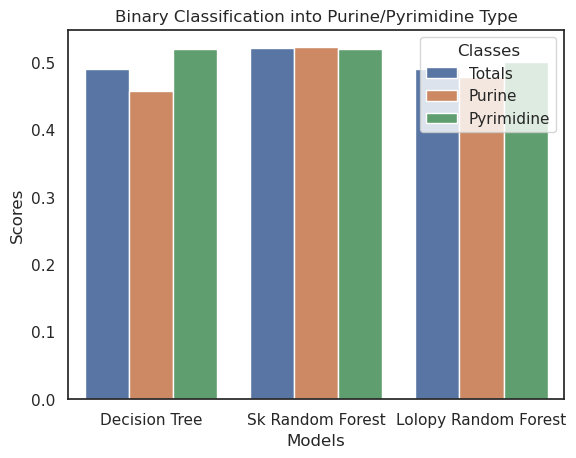

In [62]:
group_df_p = pd.DataFrame(group_list_p)
# group_df = pd.DataFrame.from_dict(group_dic)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=group_df_p).set(title='Binary Classification into Purine/Pyrimidine Type')  

# Checking across Pore types

In [36]:
# Starting with Gra data
A_g = genfromtxt('./ML Final Project Data/a_gra.csv',delimiter=',')
print(A_g.shape)
A_g_clean = A_g[1:, 1:]
print(A_g_clean.shape)
Ag_y = np.zeros([A_g_clean.shape[0],1])
# A_x_p = np.chararray([A_x_clean.shape[0],1])
A_g_p= np.zeros([A_g_clean.shape[0],1]) # 'Purine'
# A_x_p = A_x_p.reshape(-1,1)


C_g = genfromtxt('./ML Final Project Data/c_gra.csv',delimiter=',')
print(C_g.shape)
C_g_clean = C_g[1:, 1:]
print(C_g_clean.shape)
Cg_y = np.ones([C_g_clean.shape[0],1])
# C_x_p = np.chararray([C_x_clean.shape[0],1])
C_g_p= np.ones([C_g_clean.shape[0],1]) #'Pyrimidine'
# C_x_p = C_x_p.reshape(-1,1)

G_g = genfromtxt('./ML Final Project Data/g_gra.csv',delimiter=',')
print(G_g.shape)
G_g_clean = G_g[1:, 1:]
print(G_g_clean.shape)
Gg_y = np.zeros([G_g_clean.shape[0],1])
Gg_y[:]= 2
# G_x_p = np.chararray([G_x_clean.shape[0],1])
G_g_p= np.zeros([G_g_clean.shape[0],1]) #'Purine'
# G_x_p = G_x_p.reshape(-1,1)
T_g = genfromtxt('./ML Final Project Data/t_gra.csv',delimiter=',')
print(T_g.shape)
T_g_clean = T_g[1:, 1:]
print(T_g_clean.shape)
Tg_y = np.zeros([T_g_clean.shape[0],1])
Tg_y[:] = 3
T_g_p= np.ones([T_x_clean.shape[0],1]) #'Pyrimidine'

Xg = np.concatenate((A_g_clean, C_g_clean,G_g_clean,T_g_clean), axis=0)
yg = np.concatenate((Ag_y, Cg_y,Gg_y,Tg_y), axis=0)

(82, 3)
(81, 2)
(70, 3)
(69, 2)
(42, 3)
(41, 2)
(80, 3)
(79, 2)


In [37]:
(Xg_train, Xg_test, yg_train, yg_test) = train_test_split(Xg, yg, test_size =  0.3, random_state=300)

In [38]:
decTree_g = tree.DecisionTreeClassifier()
decTree_g = decTree_g.fit(Xg_train, yg_train)

decTree_g_res_pred = decTree_g.predict(Xg_test)
decTree_g_score = accuracy_score(yg_test, decTree_g_res_pred)
# with Scikit learn
sRanFor_g = RandomForestClassifier()
sRanFor_g = sRanFor_g.fit(Xg_train, yg_train.flatten())
sRanFor_g_res_pred = sRanFor_g.predict(Xg_test)
sRanFor_g_score = accuracy_score(yg_test,sRanFor_g_res_pred)
# with lolopy
lRanFor_g = loloClassifier()
lRanFor_g = lRanFor_g.fit(Xg_train, yg_train.flatten())
lRanFor_g_res_pred = lRanFor_g.predict(Xg_test)
lRanFor_g_score = accuracy_score(yg_test, lRanFor_g_res_pred)
# Accuracy plots
labels_g = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
values_g = [decTree_g_score, sRanFor_g_score, lRanFor_g_score]



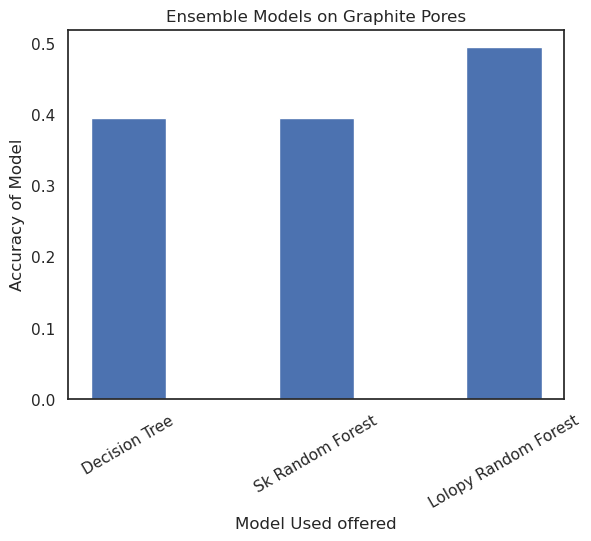

In [39]:
# creating the bar plot
plt.bar(labels_g, values_g, width = 0.4)
 
plt.xlabel("Model Used offered")
plt.ylabel("Accuracy of Model")
plt.title("Ensemble Models on Graphite Pores")
plt.xticks(rotation=30)
plt.show()

<AxesSubplot: xlabel='Models', ylabel='Scores'>

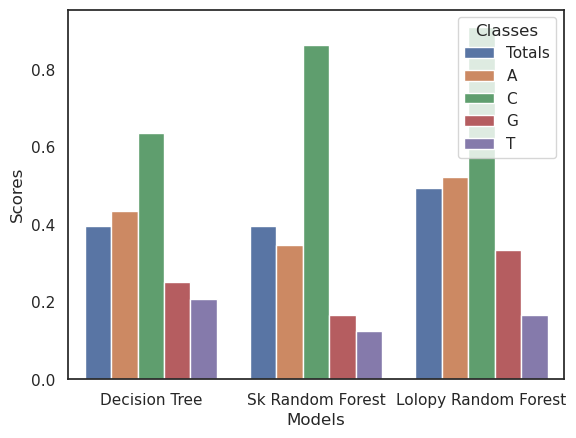

In [40]:
# Dec tree score per base
Ag_score_dec = accuracy_score(yg_test[yg_test==0], decTree_g_res_pred.reshape(-1,1)[yg_test==0])
Cg_score_dec = accuracy_score(yg_test[yg_test==1], decTree_g_res_pred.reshape(-1,1)[yg_test==1])
Gg_score_dec = accuracy_score(yg_test[yg_test==2], decTree_g_res_pred.reshape(-1,1)[yg_test==2])
Tg_score_dec = accuracy_score(yg_test[yg_test==3], decTree_g_res_pred.reshape(-1,1)[yg_test==3])

Ag_score_sF = accuracy_score(yg_test[yg_test==0], sRanFor_g_res_pred.reshape(-1,1)[yg_test==0])
Cg_score_sF = accuracy_score(yg_test[yg_test==1], sRanFor_g_res_pred.reshape(-1,1)[yg_test==1])
Gg_score_sF = accuracy_score(yg_test[yg_test==2], sRanFor_g_res_pred.reshape(-1,1)[yg_test==2])
Tg_score_sF = accuracy_score(yg_test[yg_test==3], sRanFor_g_res_pred.reshape(-1,1)[yg_test==3])

Ag_score_lF = accuracy_score(yg_test[yg_test==0], lRanFor_g_res_pred.reshape(-1,1)[yg_test==0])
Cg_score_lF = accuracy_score(yg_test[yg_test==1], lRanFor_g_res_pred.reshape(-1,1)[yg_test==1])
Gg_score_lF = accuracy_score(yg_test[yg_test==2], lRanFor_g_res_pred.reshape(-1,1)[yg_test==2])
Tg_score_lF = accuracy_score(yg_test[yg_test==3], lRanFor_g_res_pred.reshape(-1,1)[yg_test==3])

groupsg = ['Decision Tree', 'Sk Random Forest', 'Lolopy Random Forest']
totalsg = [decTree_g_score, sRanFor_g_score,lRanFor_g_score]
Ag_scores = [Ag_score_dec,Ag_score_sF,Ag_score_lF]
Cg_scores = [Cg_score_dec,Cg_score_sF,Cg_score_lF]
Gg_scores = [Gg_score_dec,Gg_score_sF,Gg_score_lF]
Tg_scores = [Tg_score_dec,Tg_score_sF,Tg_score_lF]

group_dic_g = {'Models':[*groupsg[:], *groupsg[:], *groupsg[:], *groupsg[:], *groupsg[:]],
             'Scores':[*totalsg[:], *Ag_scores[:], *Cg_scores[:], *Gg_scores[:], *Tg_scores[:]],
             'Classes': ['Totals','Totals','Totals',
                        'A','A','A','C','C','C',
                        'G','G','G','T','T', 'T']}

group_list_g = [dict(zip(group_dic_g,t)) for t in zip(*group_dic_g.values())]

group_df_g = pd.DataFrame(group_list_g)
# group_df = pd.DataFrame.from_dict(group_dic)
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Models', y='Scores', hue='Classes', data=group_df_g) 

In [41]:
## Creating a function for 